- Name: Muhammad Rizki Achirlita
- Gmail: muh.rizkiachirlita@gmail.com

In [1]:
## Basic Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
sns.set(font_scale=1.2, palette='Set1')

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 150

In [2]:
df = pd.read_csv('Data/loan_data_2007_2014.csv')
df.sample(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
377326,17635183,19767658,4000,4000,4000.0,36 months,13.98,136.68,C,C3,assembler,10+ years,RENT,22000.0,Not Verified,14-Jun,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,534xx,WI,22.37,0.0,22-Feb,0.0,NaN,79.0,8.0,1.0,4572,58.0,23.0,w,0.00,0.00,4540.59,4540.59,4000.00,540.59,0.0,0.0,0.0,15-Jul,2900.43,NaN,15-Aug,0.0,76.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,8991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7940.0,NaN,NaN,NaN
269318,32519235,35132491,15400,15400,15400.0,60 months,14.49,362.26,C,C4,Computer Technician,10+ years,MORTGAGE,45000.0,Not Verified,14-Oct,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,735xx,OK,11.33,1.0,22-Sep,1.0,11.0,NaN,6.0,0.0,5757,43.9,21.0,w,12728.33,12728.33,5059.24,5059.24,2671.67,2387.57,0.0,0.0,0.0,15-Dec,362.26,16-Jan,16-Jan,0.0,11.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,149090.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
301845,28502677,31025808,12000,12000,12000.0,36 months,13.35,406.36,C,C2,Registered Nurse,10+ years,RENT,90000.0,Verified,14-Oct,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,021xx,MA,32.19,0.0,22-Jan,2.0,NaN,NaN,20.0,0.0,28515,93.5,28.0,f,7572.47,7572.47,6095.40,6095.40,4427.53,1667.87,0.0,0.0,0.0,16-Jan,406.36,16-Feb,16-Jan,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,66986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30500.0,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [4]:
## Definsikan Target (Asumsi user memberi kriteria yang ketat)
df = df[~(df['loan_status']=='Does not meet the credit policy. Status:Fully Paid')]
df = df[~(df['loan_status']=='Does not meet the credit policy. Status:Charged Off')]
df= df.rename(columns={'loan_status': 'is_default'})
df['is_default'] = df['is_default'].replace({'Charged Off':'yes', 'Late (31-120 days)': 'yes', 
                                             'In Grace Period': 'yes', 'Late (16-30 days)': 'yes', 'Default': 'yes',
                                             'Fully Paid': 'no', 'Current': 'no'})

In [5]:
round((len(df[df['is_default']=='yes'])/df.shape[0])*100, 2)

11.77

#### Problem

Tingkat gagal bayar yang cukup besar pada Lending Company ini, yaitu 11.77%

In [6]:
df.shape

(463536, 74)

## CLEANING

In [7]:
def cleaning(df):
    '''Tujuan dari fungsi ini adalah mengetahui kondisi tipe data, unique values, dan null'''
    try:
        import pandas as pd
        variables = pd.DataFrame(columns=['Variabel', 'Tipe Data', 'Jumlah Value Unik', 'Jumlah Value Unik (%)',
                                         'Jumlah Null', 'Jumlah Null (%)', 'Value'])
        for i, var in enumerate(df.columns):
            variables.loc[i] = [var, df[var].dtypes, df[var].nunique(), round(df[var].nunique()/df.shape[0]*100, 2),
                                df[var].isnull().sum(), round(df[var].isnull().sum()/df.shape[0]*100, 2), df[var].unique()]
        return (variables.set_index('Variabel'))
    except:
        print('Input tidak sesuai')
        
cleaning(df).sort_values(by='Jumlah Null (%)', ascending=False)

,Tipe Data,Jumlah Value Unik,Jumlah Value Unik (%),Jumlah Null,Jumlah Null (%),Value
Variabel,,,,,,
inq_last_12m,float64,0,0.00,463536,100.00,[nan]
verification_status_joint,float64,0,0.00,463536,100.00,[nan]
annual_inc_joint,float64,0,0.00,463536,100.00,[nan]
open_acc_6m,float64,0,0.00,463536,100.00,[nan]
open_il_6m,float64,0,0.00,463536,100.00,[nan]
open_il_12m,float64,0,0.00,463536,100.00,[nan]
open_il_24m,float64,0,0.00,463536,100.00,[nan]
mths_since_rcnt_il,float64,0,0.00,463536,100.00,[nan]
total_bal_il,float64,0,0.00,463536,100.00,[nan]


In [8]:
column_identifier = ['id', 'member_id', 'zip_code', 'emp_title', 'addr_state']
column_null = ['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
            'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
            'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_last_record', 'mths_since_last_major_derog',
            'mths_since_last_delinq', 'next_pymnt_d']
column_desc = ['url', 'desc', 'title', 'sub_grade']
column_1value = ['policy_code', 'application_type', 'pymnt_plan']
date = ['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'issue_d']

dell_column = column_identifier + column_null + column_desc + column_1value + date

In [9]:
df.drop(dell_column, axis=1, inplace=True)

#### Alasan penghapusan kolom: 

- `column_identifier` tidak dipakai dalam pemodelan Machine Learning
- `column_null` berisi Null >45%
- `column_desc` berisi penjabaran (tidak dipakai dalam pemodelan Machine Learning)
- `column_1value` hanya berisi 1 unique value
- `date` berisi kolom dengan tipe data waktu yang memiliki kardinalitas tinggi
- `emp_title` dihapus karena terlalu banyak unique value yang bersifat kategorikal
- `pymnt_plan` dihapus karena imbalance ekstrim

In [10]:
## Periksa Data Duplicate
df.duplicated().sum()

0

In [11]:
df.shape

(463536, 37)

## EXPLORATORY DATA ANALYSIS

In [12]:
## Buat variabel berdasarkan tipe data
cats= df.select_dtypes('object').columns
nums= df.select_dtypes('number').columns
print(f'Jumlah kolom bertipe kategori {len(cats)}')
print(f'Jumlah kolom bertipe numerik {len(nums)}')

Jumlah kolom bertipe kategori 8
Jumlah kolom bertipe numerik 29


In [13]:
df[cats].describe()

,term,grade,emp_length,home_ownership,verification_status,is_default,purpose,initial_list_status
count,463536,463536,442562,463536,463536,463536,463536,463536
unique,2,7,11,6,3,2,14,2
top,36 months,B,10+ years,MORTGAGE,Verified,no,debt_consolidation,f
freq,335515,136575,149579,234619,167428,408965,273095,300256


In [14]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,463536.0,14348.575569,8287.139007,500.00,8000.0000,12000.000000,20000.0000,3.500000e+04
funded_amnt,463536.0,14324.151792,8274.892198,500.00,8000.0000,12000.000000,20000.0000,3.500000e+04
funded_amnt_inv,463536.0,14269.645970,8287.276824,0.00,8000.0000,12000.000000,19975.0000,3.500000e+04
int_rate,463536.0,13.827334,4.365371,5.42,10.9900,13.660000,16.4900,2.606000e+01
installment,463536.0,432.891377,243.447747,15.69,257.4300,381.040000,567.3425,1.409990e+03
annual_inc,463536.0,73288.385321,54871.713390,3000.00,45000.0000,63000.000000,89000.0000,7.500000e+06
dti,463536.0,17.236823,7.850529,0.00,11.3800,16.880000,22.8000,3.999000e+01
delinq_2yrs,463536.0,0.284947,0.797648,0.00,0.0000,0.000000,0.0000,2.900000e+01
inq_last_6mths,463536.0,0.784893,1.037236,0.00,0.0000,0.000000,1.0000,8.000000e+00
open_acc,463536.0,11.193599,4.982497,0.00,8.0000,10.000000,14.0000,8.400000e+01


### Univariate Analysis

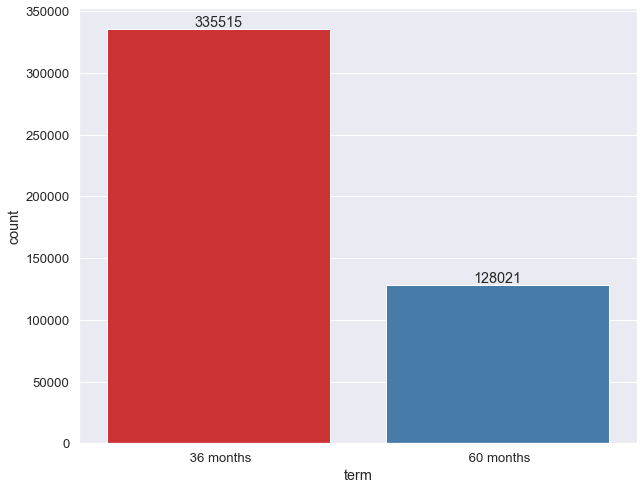

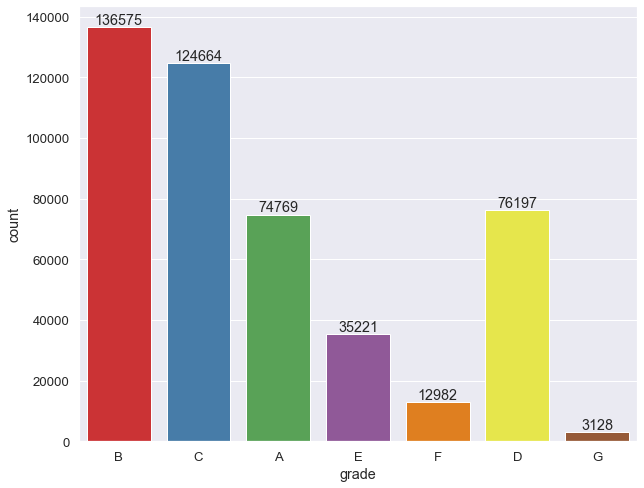

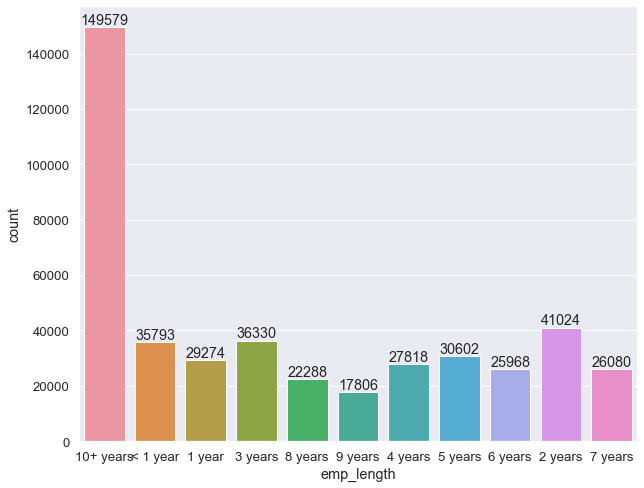

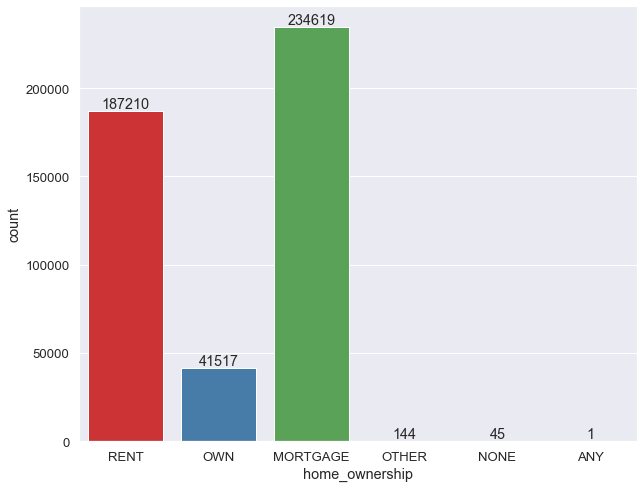

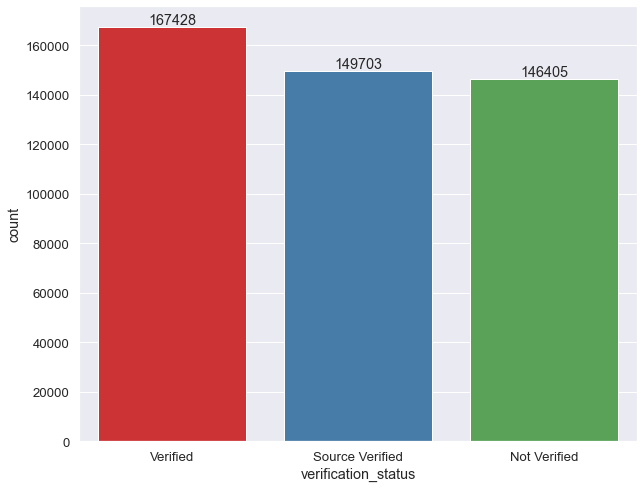

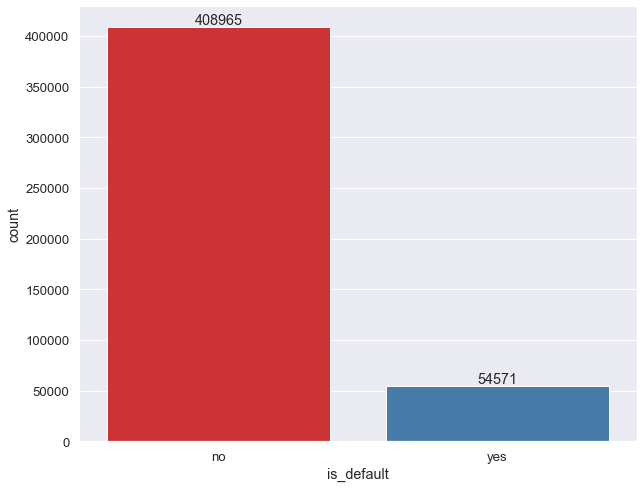

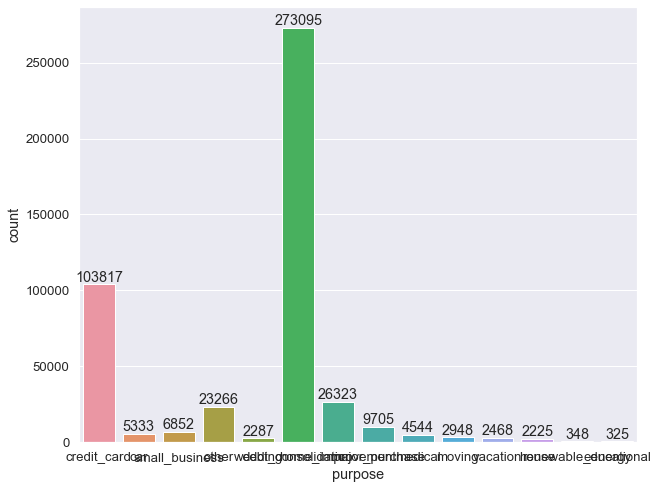

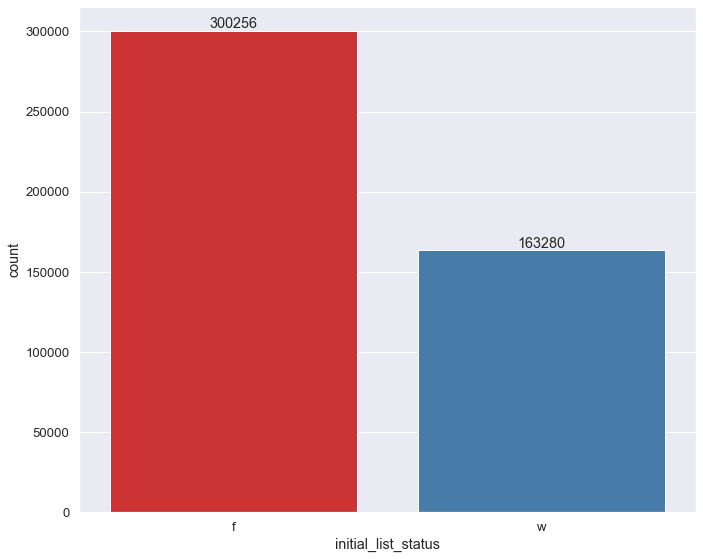

In [15]:
for a, b in enumerate(cats):
    cat = cats[a]
    plt.figure(figsize=(10,8))
    ax= sns.countplot(data=df,x=cat)        
    ax.bar_label(container=ax.containers[0])
plt.tight_layout()

Terdapat isu imbalance_class pada target

### Multivariate Analysis

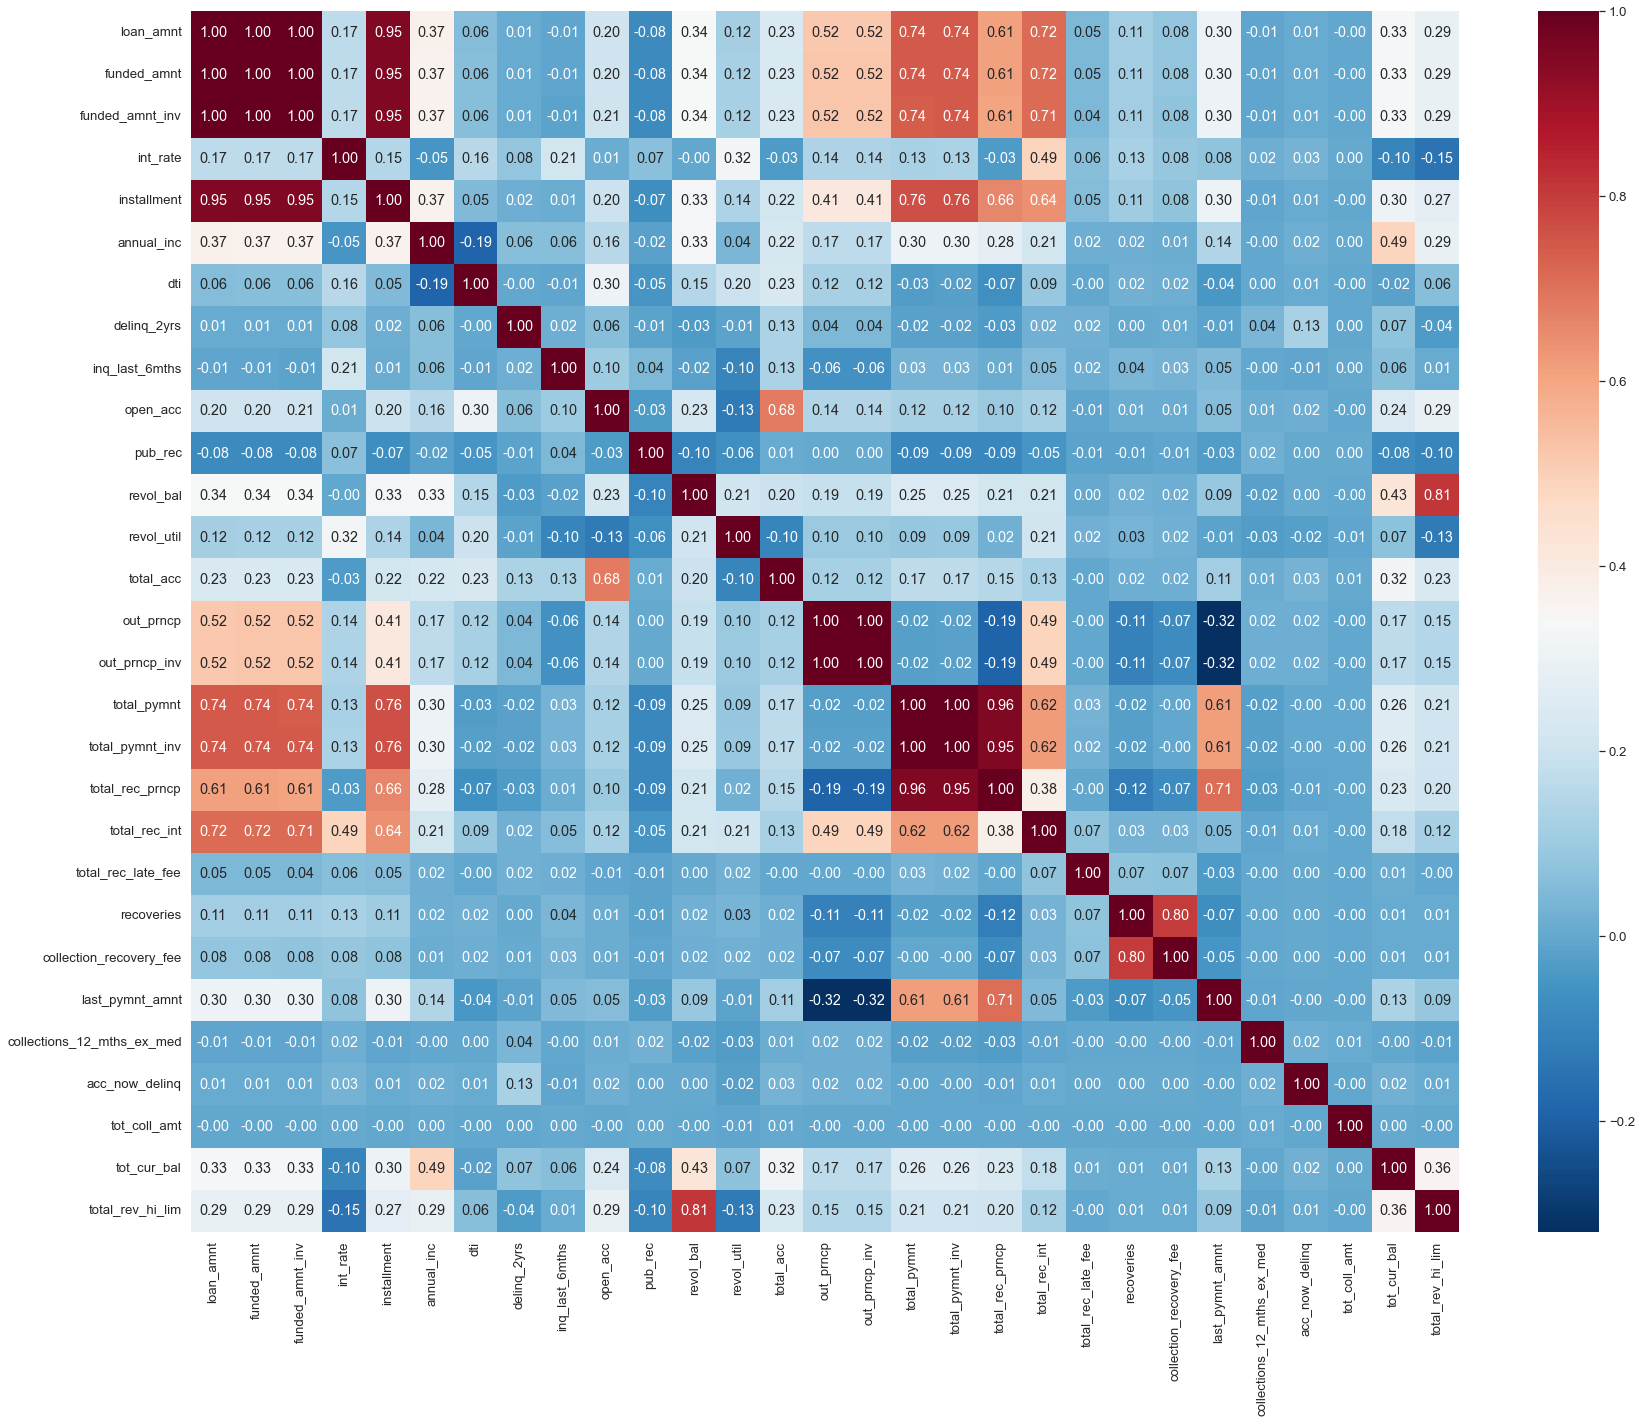

In [16]:
plt.figure(figsize=(25,20))                
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu_r')
plt.tight_layout();

Pada Heatmap saat ini, target belum diikutkan karena akan fokus untuk menemukan kolom-kolom yang terindikasi memiliki gejala multikolinearitas (>0.7).

In [17]:
corr = df.corr().abs()
multikol = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
drop_multikol = [column for column in multikol.columns if any(multikol[column] >= 0.7)]

In [18]:
drop_multikol

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim']

In [19]:
df.drop(drop_multikol, axis=1, inplace=True)
df.sample(3)

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,is_default,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
124299,35000,60 months,23.76,F,10+ years,RENT,85000.0,Verified,yes,debt_consolidation,22.08,0.0,0.0,8.0,0.0,31739,88.2,12.0,f,0.00,0.000000,0.0,0.0,0.0,0.0,62293.0
39660,5000,36 months,10.59,C,< 1 year,RENT,15000.0,Not Verified,no,other,24.40,0.0,3.0,6.0,0.0,0,0.0,6.0,f,0.00,104.942381,0.0,0.0,0.0,NaN,NaN
135806,8000,36 months,8.90,A,9 years,RENT,45000.0,Source Verified,no,major_purchase,13.65,0.0,0.0,9.0,0.0,3504,27.4,12.0,f,1247.93,0.000000,0.0,0.0,0.0,0.0,6874.0


In [20]:
## Ubah target menjadi numerik untuk melihat hubungan
df['is_default']= df['is_default'].replace({'yes': 1, 'no':0}) 

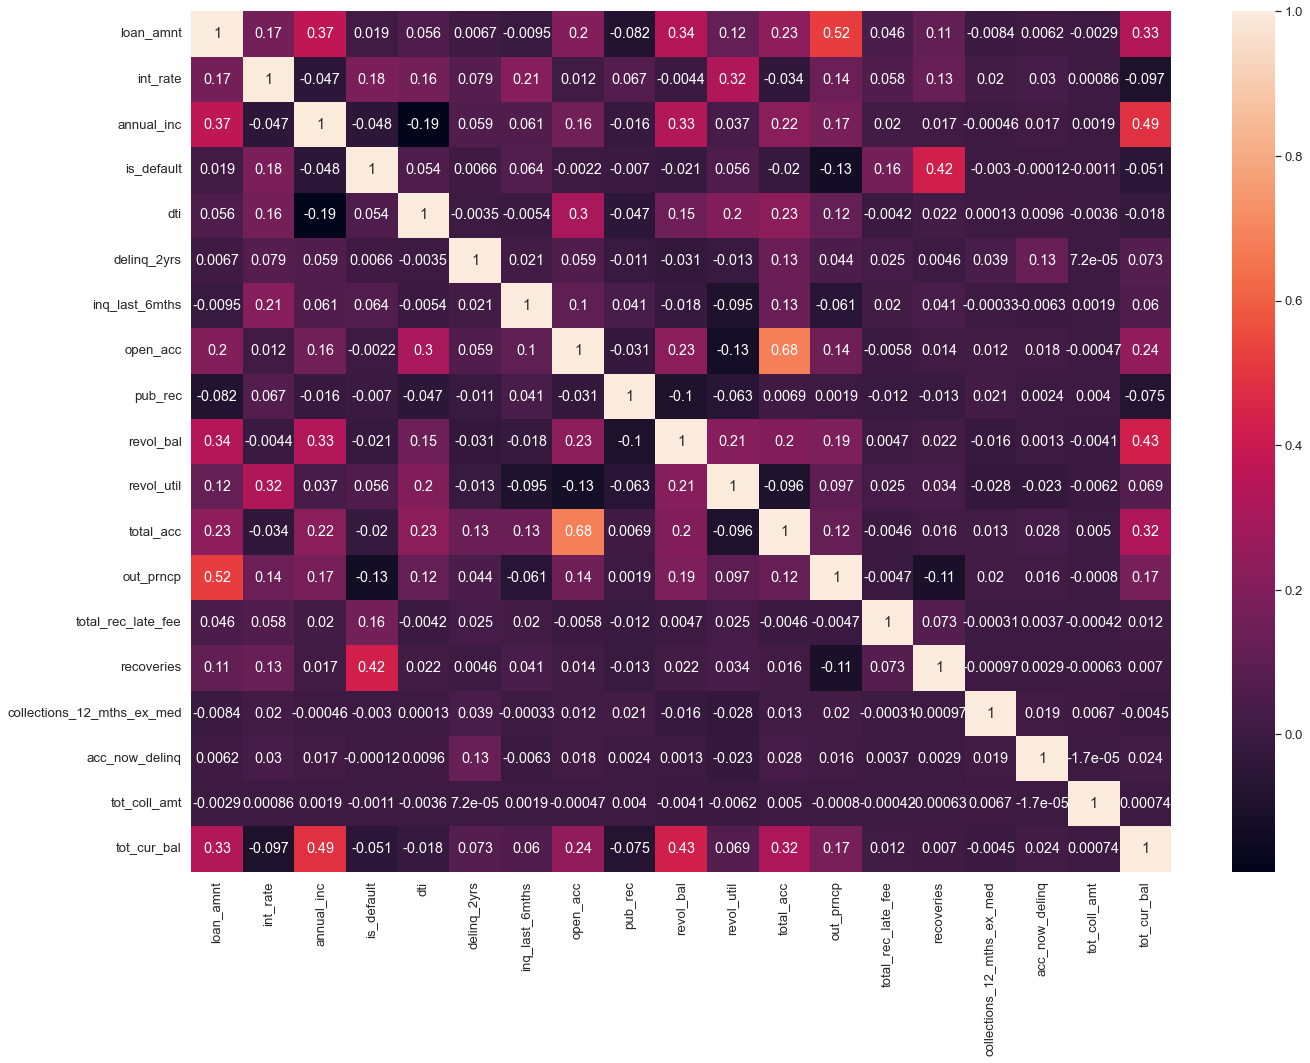

In [21]:
plt.figure(figsize=(20,15))                
sns.heatmap(df.corr(), annot=True)
plt.tight_layout();

Kolom numerik yang memiliki korelasi ke target (`is_default`): `int_rate`, `total_rec_late_fee`, `out_prncp`, `recoveries`

In [22]:
df.shape

(463536, 26)

In [23]:
df.to_csv('Data/loan_afterEDA.csv', index=False)